In [1]:
%matplotlib inline
import sympy as sym
import pylab as pl
import numpy as np
import numpy.polynomial.polynomial as n_poly
import numpy.polynomial.legendre as leg

# Mindflow

We want the best approximation of function $f$, on the space $V = \mathrm{span}\{v_i\}$. Remeber that $p\in V$ is best approximation of $f$ if and only if:

$$
(p-f,q)=0, \quad \forall q\in V.
$$

Focus one second on the fact that both $p$ and $q$ belong to $V$. We know that any $q$ can be expressed as a linear combination of the basis functions $v_i$:

$$
(p-f,v_i)=0, \quad \forall v_i\in V.
$$

Moreover $p$ is uniquely defined by the cofficents $p^j$ such that $p = p^j\,v_j$. Collecting this information together we get:

$$
(v_j,v_i) p_j = (f,v_i),\quad \forall v_i\in V.
$$

Now that we know our goal (finiding these $p^j$ coefficents) we do what the rangers do: we explore!

We understaind that we will need to invert the matrix:

$$
M_{ij} = (v_j,v_i) = \int v_i\cdot v_j
$$

What happens if we choose basis functions such that $(v_j,v_i) =  \delta_{ij}$?

How to construct numerical techniques to evaluate integrals in an efficent way?

Evaluate the $L^2$ projection.

## Orthogonal Polynomials

Grham Schmit

$p_0(x) = 0$

$$
p_k(x) = x^k - \sum_{j=0}^{k-1} \frac{(x^k,p_j(x))}{(p_j(x),p_j(x))}
$$

In [2]:
def scalar_prod(p0,p1,a=0,b=1):
    return sym.integrate(p0*p1,(t,a,b))

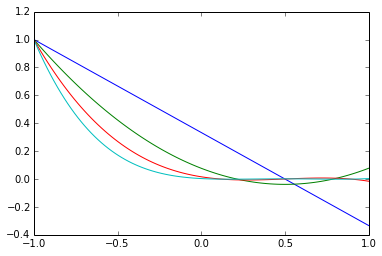

In [3]:
t = sym.symbols('t')
k = 3

Pk = [1]

for k in xrange(1,5):
    s = 0
    for j in xrange(0,k):
        s+= scalar_prod(t**k,Pk[j])/scalar_prod(Pk[j],Pk[j])*Pk[j]
    pk = t**k-s
    #pk = pk/sym.sqrt(scalar_prod(pk,pk))
    fs = sym.lambdify(t, pk, 'numpy')
    pk = pk/fs(-1.)
    Pk.append(pk)


Mij = []
for i in xrange(len(Pk)):
    row = []
    for j in xrange(len(Pk)):
        row.append(scalar_prod(Pk[i],Pk[j]))
    Mij.append(row)

Mij = sym.Matrix(Mij)
Mij

x = np.linspace(-1,1,100)

for p in Pk:
    if p != 1 :
        fs = sym.lambdify(t, p, 'numpy')
        #print x.shape
        #print fs(x)
        _ = pl.plot(x,fs(x))

## Th

Le $q$ be nonzero polynomial of degree $n+1$ and $\omega(x)$ a positive weight function, s. t.:

$$
\int_a^b x^k q(x)\, \omega(x) = 0, \quad k = 0,\ldots, n
$$

If $x_i$ are zeros of $q(x)$, then:

$$
\int_a^b f(x)\, \omega(x)\approx \sum_{i=0}^nw_i\, f(x_i)
$$

with:

$$
w_i = \int_a^b l_i(x)\, \omega(x)
$$

is exact for all polynomials of degree at most $2n+1$. Here $l_i(x)$ are the usual Lagrange interpolation polynomials.

**Proof:** assume $f(x)$ is a polynomial of degree at most $2n+1$ and show:
$$
\int_a^b f(x)\, \omega(x) = \sum_{i=0}^nw_i\, f(x_i).
$$
Usign the polynomial division we have:
$$
\underbrace{f(x)}_{2n+1} = \underbrace{q(x)}_{n+1}\, \underbrace{p(x)}_{n} + \underbrace{r(x)}_{n}.
$$
By taking $x_i$ as zeros of $q(x)$ we have:
$$
f(x_i) = r(x_i)
$$
Now:
$$
\int_a^b f(x)\, \omega(x) = \int_a^b [q(x)\, p(x) + r(x)]\, \omega(x)
$$
$$
 = \underbrace{\int_a^b q(x)\, p(x) \, \omega(x)}_{=0} + \int_a^b r(x)\, \omega(x)
$$
Since $r(x)$ is a polynomial of order $n$ this is exact:

$$
\int_a^b f(x)\, \omega(x) = \int_a^b r(x)\, \omega(x) = \sum_{i=0}^nw_i\, r(x_i)
$$

But since we choosed $x_i$ such that $f(x_i) = r(x_i)$, we have:

$$
\int_a^b f(x)\, \omega(x) = \int_a^b r(x)\, \omega(x) = \sum_{i=0}^nw_i\, f(x_i) 
$$

This completes the proof.

## Legendre Polynomial

$$
(n+1) p^{n+1}(x) = (2n+1)\, x\, p^n(x) - n\, p^{n-1}(x)
$$

[1.0, t, 1.5*t**2 - 0.5, t*(2.5*t**2 - 1.5), 4.375*t**4 - 3.75*t**2 + 0.375, t*(7.875*t**4 - 8.75*t**2 + 1.875)]
0


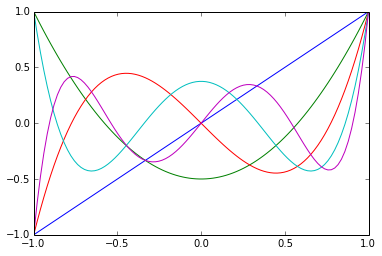

In [4]:
Pn = [1.,t]

#Pn = [1.,x, ((2*n+1)*x*Pn[n] - n*Pn[n-1])/(n+1.) for n in range(1,2)]

for n in xrange(1,5):
    pn1 = ((2*n+1)*t*Pn[n] - n*Pn[n-1])/(n+1.)
    Pn.append(sym.simplify(pn1))
    
print Pn

#print(sym.poly(p))
#print(sym.real_roots(sym.poly(p)))
print(sym.integrate(Pn[4]*Pn[3],(t,-1,1)))

for p in Pn:
    if p != 1. :
        fs = sym.lambdify(t, p, 'numpy')
        #print x.shape
        #print fs(x)
        _ = pl.plot(x,fs(x))


In our proof we selected to evaluate $x_i$ at the zeros of the legendre polynomials, this is why we need to evaluate the zeros of the polynomials.

In [5]:
print(sym.real_roots(sym.poly(Pn[2])))

#q = [-1.]+sym.real_roots(sym.poly(Pn[2]))+[1.]
q = sym.real_roots(sym.poly(Pn[3]))
print(q)

#for p in Pn:
#    if p != 1. :
#        #print(sym.poly(p))
#        #print(sym.real_roots(sym.poly(p)))
#        print(sym.nroots(sym.poly(p)))



[-sqrt(3)/3, sqrt(3)/3]
[-sqrt(15)/5, 0, sqrt(15)/5]


$$
w_i = \int_{-1}^{1} l_i(x)
$$

[1.0, 1.0, 1.0]
[0.833333333333333*t*(t - sqrt(15)/5), -1.66666666666667*(t - sqrt(15)/5)*(t + sqrt(15)/5), 0.833333333333333*t*(t + sqrt(15)/5)]


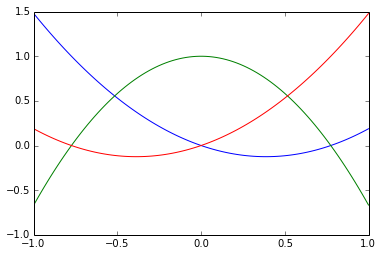

In [6]:
Lg = [1. for i in xrange(len(q))]
print(Lg)

#for i in xrange(n+1):
for i in xrange(len(q)):
    for j in xrange(len(q)):
        if j != i:
            Lg[i] *= (t-q[j])/(q[i]-q[j])

print(Lg)

x = np.linspace(-1,1,100)

for l in Lg:
    fs = sym.lambdify(t, l, 'numpy')
    _ = pl.plot(x,fs(x))

In [7]:
for l in Lg:
    print(sym.integrate(l,(t,-1,1)))

0.555555555555555
0.888888888888889
0.555555555555555


### Hint
Proiezione usando polinomi LEGENDRE (f,v_i)

# Now let's get Numerical

From now on I work on the $[0,1]$ interval, becouse i like it this way :)



In the previus section we explored what sympbolically was happening, now we implement things on the computer. We saw how important are the legendre plynomials. Here a little documentation on that. I pont it out not because you need to read it all, but because I would like you get some aquitance with this criptic documentation pages [doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polynomial.legendre.legroots.html#numpy.polynomial.legendre.legroots).

The problem we aim at solving is finding the coefficents $p_j$ such that:
$$
(v_j,v_i) p^j = (f,v_i),\quad \forall v_i\in V.
$$
Remind in this section the einstein notation holds.

We can expand the compact scalar product notation:
$$
p^j \int_0^1 v_i\, v_j = \int_0^1 f\, v_i,\quad \forall v_i\in V.
$$

We consider $V = \mathrm{span}\{l_i\}$. Our problem becomes:
$$
p^j \int_0^1 l_i\, l_j = \int_0^1 f\, l_i,\quad \mathrm{for}\ i = 0,\ldots,\mathtt{deg}
$$
Let's focus on mass matrix:
$$
\int_0^1 l_i(x)\, l_j(x) = \sum_k l_i(x_k)\, w_k\, l_j(x_k)
$$

In [23]:
def gauss_points(nq):
    if nq==1:
        return .5
    elif q>1:
        coeffs = np.zeros(nq+1)
        coeffs[-1] = 1.
        return .5* leg.legroots(coeffs)+.5

In [24]:
print gauss_points(3)
print(np.sqrt(3./5.)*.5)+.5

[ 0.11270167  0.5         0.88729833]
0.887298334621


In [25]:
def define_lagrange_basis_set(q):
    n = q.shape[0]
    L = [n_poly.Polynomial.fromroots([xj for xj in q if xj != q[i]]) for i in xrange(n)]
    L = [L[i]/L[i](q[i]) for i in range(n)]
    return L

def define_legandre_basis_set(q):
    #
    #
    return L

differenza fra le roots "simboliche" e non

In [43]:
deg = 4
Nq = 10#deg+1
p,w = leg.leggauss(Nq)
w = .5 * w
p = .5*(p+1)
#print p
#print w
W = np.diag(w)
#print W

5


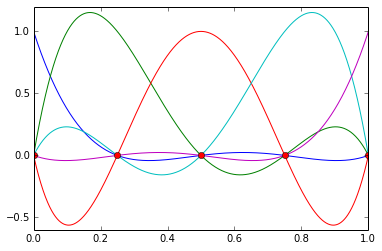

In [44]:
int_p = np.linspace(0,1,deg+1)
L = define_lagrange_basis_set(int_p)

print(len(L))

x = np.linspace(0,1,1025)
for f in L:
    _ = pl.plot(x, f(x))
_ = pl.plot(int_p, 0*int_p, 'ro')

In [48]:
B = np.zeros((0,Nq))
for l in L:
    B = np.vstack([B,l(p)])

[ 0.89519003  0.53600806  0.16095604 -0.02574714 -0.02597911  0.01924622
  0.01017755 -0.03072566 -0.03877998 -0.0118337 ]
[ 0.197158    0.79248842  1.15046184  0.8761224   0.25189259 -0.13630675
 -0.06251776  0.17500609  0.21193777  0.06339239]
[-0.14390672 -0.50165428 -0.45569831  0.20196495  0.89114705  0.89114705
  0.20196495 -0.45569831 -0.50165428 -0.14390672]
[ 0.06339239  0.21193777  0.17500609 -0.06251776 -0.13630675  0.25189259
  0.8761224   1.15046184  0.79248842  0.197158  ]
[-0.0118337  -0.03877998 -0.03072566  0.01017755  0.01924622 -0.02597911
 -0.02574714  0.16095604  0.53600806  0.89519003]


Recall:
$$
B\, W\, B^T u = B W G
$$

(5, 10)
[[ 0.89519003  0.53600806  0.16095604 -0.02574714 -0.02597911  0.01924622
   0.01017755 -0.03072566 -0.03877998 -0.0118337 ]
 [ 0.197158    0.79248842  1.15046184  0.8761224   0.25189259 -0.13630675
  -0.06251776  0.17500609  0.21193777  0.06339239]
 [-0.14390672 -0.50165428 -0.45569831  0.20196495  0.89114705  0.89114705
   0.20196495 -0.45569831 -0.50165428 -0.14390672]
 [ 0.06339239  0.21193777  0.17500609 -0.06251776 -0.13630675  0.25189259
   0.8761224   1.15046184  0.79248842  0.197158  ]
 [-0.0118337  -0.03877998 -0.03072566  0.01017755  0.01924622 -0.02597911
  -0.02574714  0.16095604  0.53600806  0.89519003]]
5
14.1390607069


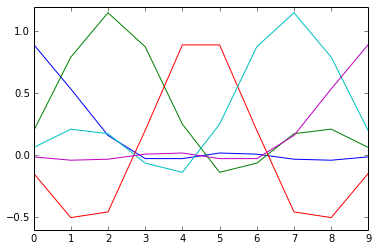

In [52]:
print(B.shape)
print(B)
_ = pl.plot(B.T)
M = B.dot(W.dot(B.T))
print np.linalg.matrix_rank(M)
print np.linalg.cond(M)

In [ ]:
def step_function():
    def sf(x):    
        index = where((x>.3) & (x<.7))
        step = zeros(x.shape)
        step[index] = 1
        return step
    return lambda x : sf(x)

In [55]:
g = lambda x: np.sin(2*np.pi*x)
#g = step_function()
p = p.reshape((p.shape[0],1))

G = g(p)
print G.shape
print B.shape
print W.shape
G = B.dot(W.dot(G))

(10, 1)
(5, 10)
(10, 10)


In [57]:
u = np.linalg.solve(M, G)
print u

[[ -2.03312254e-01]
 [  9.84195666e-01]
 [ -1.08569841e-15]
 [ -9.84195666e-01]
 [  2.03312254e-01]]


In [58]:
def get_interpolating_function(LL,ui):
    def func(LL,ui,x):
        acc = 0
        for L,u in zip(LL,ui):
            #print(L,u)
            acc+=u*L(x)
        return acc
    return lambda x : func(LL,ui,x)

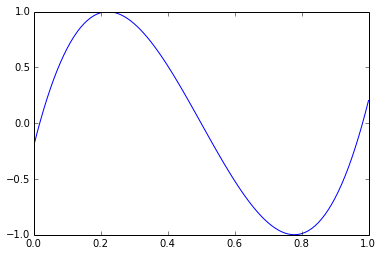

In [62]:
I = get_interpolating_function(L,u)
sampling = np.linspace(0,1,101)
_= pl.plot(sampling, I(sampling))
#plot(xp, G,'ro')

## Diference in between projection and interpolation runge example 

Proiezione usando polinomi LEGENDRE (f,v_i) con quadratura con 18 punti

Interpolazione usando polinomi LAGRANGE (sui punti di quadratura che sono i punti di gauss della funzione sopra)